In [2]:
#importing and reading the file diabetes.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_csv("C:/Users/WIN10/Downloads/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#shows the number of nan values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.size

6912

In [7]:
df.shape

(768, 9)

In [8]:
df.ndim

2

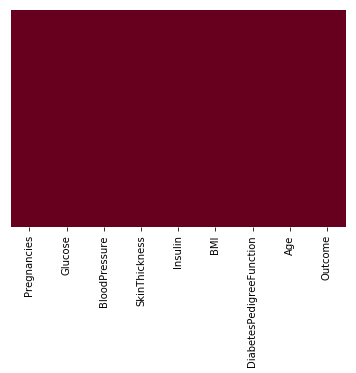

In [9]:
#it gives the heatmap to check the entities
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="RdBu")

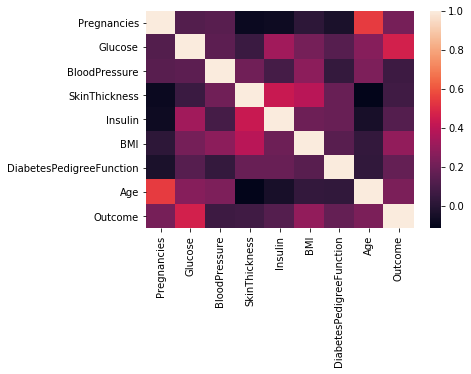

In [10]:
#we can compare through this whether the max is seen at what
#as we can see the outcome is majorly dependent on glucose
#thus showing the dependency of outcome is glucose
sns.heatmap(df.corr())

In [11]:

df1=df.drop("Outcome",axis=1)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
df2=df["Outcome"]
df2.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
#spliting the test and train in 70/30 formatfor testing various parameters
df1_train,df1_test,df2_train,df2_test=train_test_split(df1,df2,test_size=0.3,random_state=43)

In [14]:
df1_test.shape


(231, 8)

In [15]:
df2_train.shape

(537,)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [17]:
df2_test.value_counts()

0    152
1     79
Name: Outcome, dtype: int64

In [18]:
test_accuracy=[]
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,auc
#
for k in range(1,40,3):
    print("K=",k)
    neigh=KNeighborsClassifier(n_neighbors=k)
    
    neigh.fit(df1_train,df2_train)
    print("Train confusion matrix")
    print(confusion_matrix(df2_train,neigh.predict(df1_train)))
    print("test confusion matrix")
    print(confusion_matrix(df2_test,neigh.predict(df1_test)))
    print(accuracy_score(df2_test,neigh.predict(df1_test)))
    print("*"*50)
    test_accuracy.append(accuracy_score(df2_test,neigh.predict(df1_test)))

K= 1
Train confusion matrix
[[348   0]
 [  0 189]]
test confusion matrix
[[108  44]
 [ 34  45]]
0.6623376623376623
**************************************************
K= 4
Train confusion matrix
[[331  17]
 [ 90  99]]
test confusion matrix
[[134  18]
 [ 47  32]]
0.7186147186147186
**************************************************
K= 7
Train confusion matrix
[[305  43]
 [ 77 112]]
test confusion matrix
[[129  23]
 [ 38  41]]
0.7359307359307359
**************************************************
K= 10
Train confusion matrix
[[323  25]
 [ 97  92]]
test confusion matrix
[[140  12]
 [ 45  34]]
0.7532467532467533
**************************************************
K= 13
Train confusion matrix
[[315  33]
 [ 81 108]]
test confusion matrix
[[139  13]
 [ 38  41]]
0.7792207792207793
**************************************************
K= 16
Train confusion matrix
[[320  28]
 [ 99  90]]
test confusion matrix
[[143   9]
 [ 40  39]]
0.7878787878787878
**************************************************
K

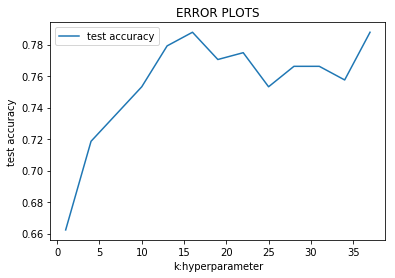

In [19]:
#plotting the value for finding k accurancy
k=np.arange(1,40,3)
plt.plot(k,test_accuracy,label="test accuracy")

plt.legend()
plt.xlabel("k:hyperparameter")
plt.ylabel("test accuracy")
plt.title("ERROR PLOTS")
plt.show()

In [20]:
#neither take k too small or too big 
#a big value of k leads to underfit(both train and test accuracy will decrease)
#a small value of k makes overfit(model is learning everything)(gap between train and test will be high)
neigh = KNeighborsClassifier(n_neighbors=35)
neigh.fit(df1_train,df2_train)
print("test confusion matrix")
print(confusion_matrix(df2_test,neigh.predict(df1_test)))

test confusion matrix
[[143   9]
 [ 38  41]]


In [21]:
pred=neigh.predict(df1_test)
accuracy_score(df2_test,pred)

0.7965367965367965

In [22]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [25]:
from sklearn.metrics import classification_report


In [27]:
print(classification_report(df2_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       152
           1       0.82      0.52      0.64        79

   micro avg       0.80      0.80      0.80       231
   macro avg       0.81      0.73      0.75       231
weighted avg       0.80      0.80      0.78       231



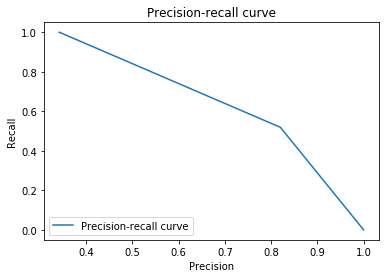

In [30]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(df2_test, pred)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')

plt.legend(loc="lower left")